## Crypto Arbitrage

In this Challenge, you'll take on the role of an analyst at a high-tech investment firm. The vice president (VP) of your department is considering arbitrage opportunities in Bitcoin and other cryptocurrencies. As Bitcoin trades on markets across the globe, can you capitalize on simultaneous price dislocations in those markets by using the powers of Pandas?

For this assignment, you’ll sort through historical trade data for Bitcoin on two exchanges: Bitstamp and Coinbase. Your task is to apply the three phases of financial analysis to determine if any arbitrage opportunities exist for Bitcoin.

This aspect of the Challenge will consist of 3 phases.

1. Collect the data.

2. Prepare the data.

3. Analyze the data. 



###  Import the required libraries and dependencies.

In [1]:
import pandas as pd
import numpy as np
from pathlib import Path
%matplotlib inline

## Collect the Data

To collect the data that you’ll need, complete the following steps:

Instructions. 

1. Using the Pandas `read_csv` function and the `Path` module, import the data from `bitstamp.csv` file, and create a DataFrame called `bitstamp`. Set the DatetimeIndex as the Timestamp column, and be sure to parse and format the dates.

2. Use the `head` (and/or the `tail`) function to confirm that Pandas properly imported the data.

3. Repeat Steps 1 and 2 for `coinbase.csv` file.

### Step 1: Using the Pandas `read_csv` function and the `Path` module, import the data from `bitstamp.csv` file, and create a DataFrame called `bitstamp`. Set the DatetimeIndex as the Timestamp column, and be sure to parse and format the dates.

In [2]:
# Read in the CSV file called "bitstamp.csv" using the Path module. 
# The CSV file is located in the Resources folder.
# Set the index to the column "Date"
# Set the parse_dates and infer_datetime_format parameters
bitstamp = pd.read_csv(
    Path("./Resources/bitstamp.csv"),
    index_col="Timestamp",
    parse_dates=True,
    infer_datetime_format=True
)

In [3]:
### Step 2: Use the `head` (and/or the `tail`) function to confirm that Pandas properly imported the data.

# Use the head (and/or tail) function to confirm that the data was imported properly.
bitstamp.head()

,Open,High,Low,Close,BTC Volume,USD Volume,Weighted Price
Timestamp,,,,,,,
2018-01-01 00:00:00,13681.04,13681.04,13637.93,$13646.48,3.334553,45482.128785,13639.647479
2018-01-01 00:01:00,13646.48,13658.75,13610.18,$13658.75,2.663188,36361.390888,13653.332816
2018-01-01 00:02:00,13616.93,13616.93,13610.06,$13610.22,0.084653,1152.144036,13610.136247
2018-01-01 00:03:00,13610.27,13639.09,13610.27,$13639.09,7.182986,97856.416478,13623.361128
2018-01-01 00:04:00,13635.35,13636.35,13620.00,$13620.0,1.069665,14582.660932,13632.923329


### Step 3: Repeat Steps 1 and 2 for `coinbase.csv` file.

In [4]:
# Read in the CSV file called "coinbase.csv" using the Path module. 
# The CSV file is located in the Resources folder.
# Set the index to the column "Timestamp"
# Set the parse_dates and infer_datetime_format parameters
coinbase = pd.read_csv(
    Path("./Resources/coinbase.csv"),
    index_col="Timestamp",
    parse_dates=True,
    infer_datetime_format=True
)

In [5]:
# Use the head (and/or tail) function to confirm that the data was imported properly.
display(coinbase.head(3))
display(coinbase.tail(3))

,Open,High,Low,Close,BTC Volume,USD Volume,Weighted Price
Timestamp,,,,,,,
2018-01-01 00:00:00,13620.00,13620.00,13608.49,$13608.49,20.812754,283451.08537,13619.105106
2018-01-01 00:01:00,13607.14,13607.14,13601.66,$13601.66,13.474359,183283.97801,13602.426919
2018-01-01 00:02:00,13601.44,13601.44,13580.00,$13580.0,11.536360,156789.19686,13590.872506


,Open,High,Low,Close,BTC Volume,USD Volume,Weighted Price
Timestamp,,,,,,,
2018-03-31 23:57:00,6930.01,6933.91,6930.01,$6933.91,0.776431,5382.532162,6932.405747
2018-03-31 23:58:00,6933.91,6938.00,6933.90,$6937.31,0.133413,925.356547,6936.048538
2018-03-31 23:59:00,6937.30,6937.30,6931.09,$6934.0,1.012720,7022.275088,6934.070316


## Prepare the Data

To prepare and clean your data for analysis, complete the following steps:

1. For the bitstamp DataFrame, replace or drop all `NaN`, or missing, values in the DataFrame.

2. Use the `str.replace` function to remove the dollar signs ($) from the values in the Close column.

3. Convert the data type of the Close column to a `float`.

4. Review the data for duplicated values, and drop them if necessary.

5. Repeat Steps 1–4 for the coinbase DataFrame.

### Step 1: For the bitstamp DataFrame, replace or drop all `NaN`, or missing, values in the DataFrame.

In [6]:
# For the bitstamp DataFrame, replace or drop all NaNs or missing values in the DataFrame
# First figure out what type of data we have
bitstamp.dtypes

Open              float64
High              float64
Low               float64
Close              object
BTC Volume        float64
USD Volume        float64
Weighted Price    float64
dtype: object

In [7]:
# Then describe the data
bitstamp.describe()

,Open,High,Low,BTC Volume,USD Volume,Weighted Price
count,129067.000000,129067.000000,129067.000000,129067.000000,1.290670e+05,129067.000000
mean,10459.993683,10472.970114,10446.214703,11.792878,1.177496e+05,10459.384448
std,2315.909269,2318.929342,2312.331601,21.799938,2.070551e+05,2315.723480
min,5945.950000,5975.060000,5920.720000,0.000039,3.333436e-01,5949.997212
25%,8613.985000,8621.655000,8604.440000,1.711874,1.773244e+04,8613.587020
50%,10145.300000,10156.410000,10131.740000,4.994095,5.188050e+04,10144.740411
75%,11444.455000,11453.990000,11431.970000,12.717950,1.313104e+05,11443.791560
max,17234.980000,17234.990000,17214.960000,580.646391,5.483271e+06,17227.810502


In [8]:
# Determine how many lines of data are null
bitstamp.isnull().mean()

Open              0.003651
High              0.003651
Low               0.003651
Close             0.000000
BTC Volume        0.003651
USD Volume        0.003651
Weighted Price    0.003651
dtype: float64

In [9]:
#Since data is pretty clean (0.003.6%) we will replace the null lines with the mean
bitstamp = bitstamp.fillna(bitstamp.mean())
bitstamp.isnull().sum()



C:\Users\jonm5\AppData\Local\Temp\ipykernel_22584\3158580001.py:2: FutureWarning: Dropping of nuisance columns in DataFrame reductions (with 'numeric_only=None') is deprecated; in a future version this will raise TypeError.  Select only valid columns before calling the reduction.
  bitstamp = bitstamp.fillna(bitstamp.mean())


Open              0
High              0
Low               0
Close             0
BTC Volume        0
USD Volume        0
Weighted Price    0
dtype: int64

### Step 2: Use the `str.replace` function to remove the dollar signs ($) from the values in the Close column.

In [10]:
# Use the str.replace function to remove the dollar sign, $
bitstamp.loc[:,"Close"] = bitstamp.loc[:,"Close"].str.replace("$","")
bitstamp
bitstamp.dtypes

C:\Users\jonm5\AppData\Local\Temp\ipykernel_22584\1518402922.py:2: FutureWarning: The default value of regex will change from True to False in a future version. In addition, single character regular expressions will *not* be treated as literal strings when regex=True.
  bitstamp.loc[:,"Close"] = bitstamp.loc[:,"Close"].str.replace("$","")


Open              float64
High              float64
Low               float64
Close              object
BTC Volume        float64
USD Volume        float64
Weighted Price    float64
dtype: object

### Step 3: Convert the data type of the Close column to a `float`.

In [11]:
# Convert the Close data type to a float
bitstamp.loc[:,"Close"] = bitstamp.loc[:,"Close"].astype("float")
bitstamp
bitstamp.dtypes

Open              float64
High              float64
Low               float64
Close             float64
BTC Volume        float64
USD Volume        float64
Weighted Price    float64
dtype: object

### Step 4: Review the data for duplicated values, and drop them if necessary.

In [12]:
# Review the data for duplicate values, and drop them if necessary
bitstamp.duplicated().sum()

472

In [13]:
#dropping duplicates
bitstamp = bitstamp.drop_duplicates()
bitstamp
bitstamp.duplicated().sum()

0

### Step 5: Repeat Steps 1–4 for the coinbase DataFrame.

In [14]:
# For the coinbase DataFrame, replace or drop all NaNs or missing values in the DataFrame
# First figure out what type of data we have
coinbase.dtypes

Open              float64
High              float64
Low               float64
Close              object
BTC Volume        float64
USD Volume        float64
Weighted Price    float64
dtype: object

In [15]:
# Then describe the data
coinbase.describe()

,Open,High,Low,BTC Volume,USD Volume,Weighted Price
count,129322.000000,129322.000000,129322.000000,129322.000000,1.293220e+05,129322.000000
mean,10449.213185,10456.118514,10441.872248,15.666556,1.572565e+05,10448.964130
std,2317.194653,2317.710389,2316.570594,27.481647,2.667879e+05,2317.167139
min,5882.300000,5907.280000,5873.000000,0.000442,6.699174e+00,5883.394912
25%,8609.230000,8613.872500,8603.505000,2.999125,3.071222e+04,8609.135020
50%,10137.440000,10145.900000,10127.880000,7.092572,7.461366e+04,10136.035004
75%,11397.522500,11400.000000,11390.000000,16.954279,1.754530e+05,11396.970843
max,17178.000000,17178.000000,17177.990000,959.084903,1.152334e+07,17177.995495


In [16]:
# Determine how many lines of data are null
coinbase.isnull().mean()

Open              0.001683
High              0.001683
Low               0.001683
Close             0.000000
BTC Volume        0.001683
USD Volume        0.001683
Weighted Price    0.001683
dtype: float64

In [17]:
#Since data is pretty clean (0.0016%) we will replace the null lines with the mean.  This is also consistent with the bitstamp data as well
coinbase = coinbase.fillna(coinbase.mean())
coinbase.isnull().sum()

C:\Users\jonm5\AppData\Local\Temp\ipykernel_22584\3317635478.py:2: FutureWarning: Dropping of nuisance columns in DataFrame reductions (with 'numeric_only=None') is deprecated; in a future version this will raise TypeError.  Select only valid columns before calling the reduction.
  coinbase = coinbase.fillna(coinbase.mean())


Open              0
High              0
Low               0
Close             0
BTC Volume        0
USD Volume        0
Weighted Price    0
dtype: int64

In [18]:
# Use the str.replace function to remove the dollar sign, $
coinbase.loc[:,"Close"] = coinbase.loc[:,"Close"].str.replace("$","")
coinbase
coinbase.dtypes

C:\Users\jonm5\AppData\Local\Temp\ipykernel_22584\3837111183.py:2: FutureWarning: The default value of regex will change from True to False in a future version. In addition, single character regular expressions will *not* be treated as literal strings when regex=True.
  coinbase.loc[:,"Close"] = coinbase.loc[:,"Close"].str.replace("$","")


Open              float64
High              float64
Low               float64
Close              object
BTC Volume        float64
USD Volume        float64
Weighted Price    float64
dtype: object

In [19]:
# Convert the Close data type to a float
coinbase.loc[:,"Close"] = coinbase.loc[:,"Close"].astype("float")
coinbase
coinbase.dtypes

Open              float64
High              float64
Low               float64
Close             float64
BTC Volume        float64
USD Volume        float64
Weighted Price    float64
dtype: object

In [20]:
# Review the data for duplicate values, and drop them if necessary
coinbase.duplicated().sum()

217

In [21]:
#dropping duplicates
coinbase = coinbase.drop_duplicates()
coinbase
coinbase.duplicated().sum()

0

## Analyze the Data

Your analysis consists of the following tasks: 

1. Choose the columns of data on which to focus your analysis.

2. Get the summary statistics and plot the data.

3. Focus your analysis on specific dates.

4. Calculate the arbitrage profits.

### Step 1: Choose columns of data on which to focus your analysis.

Select the data you want to analyze. Use `loc` or `iloc` to select the following columns of data for both the bitstamp and coinbase DataFrames:

* Timestamp (index)

* Close


In [22]:
# Use loc or iloc to select `Timestamp (the index)` and `Close` from bitstamp DataFrame
bitstamp_sliced = bitstamp.iloc[:,[0, 4]]
bitstamp_sliced
# Review the first five rows of the DataFrame
bitstamp_sliced.head()

,Open,BTC Volume
Timestamp,,
2018-01-01 00:00:00,13681.04,3.334553
2018-01-01 00:01:00,13646.48,2.663188
2018-01-01 00:02:00,13616.93,0.084653
2018-01-01 00:03:00,13610.27,7.182986
2018-01-01 00:04:00,13635.35,1.069665


In [23]:
# Use loc or iloc to select `Timestamp (the index)` and `Close` from coinbase DataFrame
coinbase_sliced = coinbase.iloc[:,[0, 4]]
coinbase_sliced

# Review the first five rows of the DataFrame
coinbase_sliced.head()

,Open,BTC Volume
Timestamp,,
2018-01-01 00:00:00,13620.00,20.812754
2018-01-01 00:01:00,13607.14,13.474359
2018-01-01 00:02:00,13601.44,11.536360
2018-01-01 00:03:00,13587.31,16.328039
2018-01-01 00:04:00,13550.34,9.955364


### Step 2: Get summary statistics and plot the data.

Sort through the time series data associated with the bitstamp and coinbase DataFrames to identify potential arbitrage opportunities. To do so, complete the following steps:

1. Generate the summary statistics for each DataFrame by using the `describe` function.

2. For each DataFrame, create a line plot for the full period of time in the dataset. Be sure to tailor the figure size, title, and color to each visualization.

3. In one plot, overlay the visualizations that you created in Step 2 for bitstamp and coinbase. Be sure to adjust the legend and title for this new visualization.

4. Using the `loc` and `plot` functions, plot the price action of the assets on each exchange for different dates and times. Your goal is to evaluate how the spread between the two exchanges changed across the time period that the datasets define. Did the degree of spread change as time progressed?

In [24]:
# Generate the summary statistics for the bitstamp DataFrame
bitstamp.describe()

,Open,High,Low,Close,BTC Volume,USD Volume,Weighted Price
count,129068.000000,129068.000000,129068.000000,129067.000000,129068.000000,1.290680e+05,129068.000000
mean,10459.993683,10472.970114,10446.214703,10459.842453,11.792878,1.177496e+05,10459.384448
std,2315.900298,2318.920359,2312.322643,2315.976088,21.799853,2.070543e+05,2315.714509
min,5945.950000,5975.060000,5920.720000,5944.000000,0.000039,3.333436e-01,5949.997212
25%,8613.987500,8621.657500,8604.445000,8613.370000,1.711895,1.773260e+04,8613.589463
50%,10145.310000,10156.415000,10131.745000,10145.950000,4.994099,5.188055e+04,10144.749893
75%,11444.432500,11453.990000,11431.960000,11444.810000,12.717763,1.313100e+05,11443.790807
max,17234.980000,17234.990000,17214.960000,17234.980000,580.646391,5.483271e+06,17227.810502


In [25]:
# Generate the summary statistics for the coinbase DataFrame
coinbase.describe()

,Open,High,Low,Close,BTC Volume,USD Volume,Weighted Price
count,129323.000000,129323.000000,129323.000000,129322.000000,129323.000000,1.293230e+05,129323.000000
mean,10449.213185,10456.118514,10441.872248,10449.140958,15.666556,1.572565e+05,10448.964130
std,2317.185694,2317.701428,2316.561637,2317.197419,27.481541,2.667869e+05,2317.158180
min,5882.300000,5907.280000,5873.000000,5882.310000,0.000442,6.699174e+00,5883.394912
25%,8609.250000,8613.875000,8603.510000,8609.230000,2.999165,3.071232e+04,8609.147091
50%,10137.500000,10145.920000,10127.890000,10137.440000,7.092601,7.461585e+04,10136.037224
75%,11397.515000,11400.000000,11390.000000,11397.237500,16.954254,1.754525e+05,11396.968282
max,17178.000000,17178.000000,17177.990000,17177.990000,959.084903,1.152334e+07,17177.995495


<AxesSubplot:title={'center':'Bitstamp Open'}, xlabel='Timestamp'>

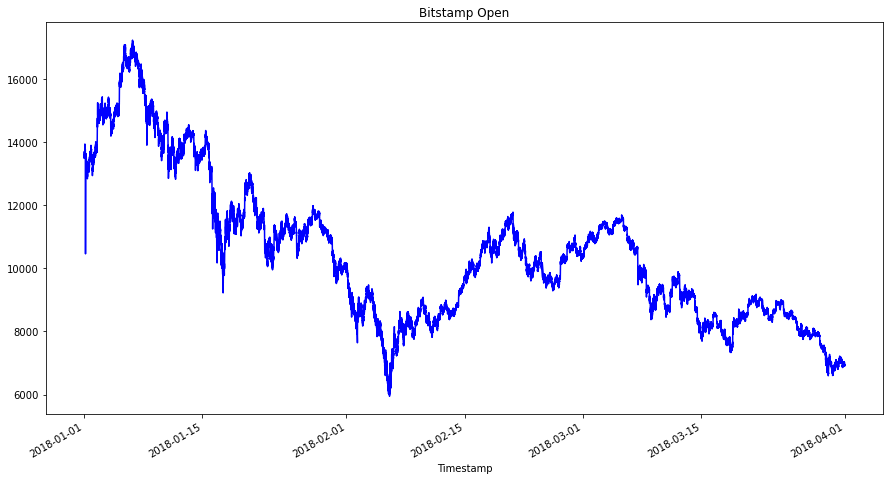

In [26]:
# Create a line plot for the bitstamp DataFrame for the full length of time in the dataset 
# Be sure that the figure size, title, and color are tailored to each visualization
bitstamp['Open'].plot(figsize=(15,8), title = "Bitstamp Open", color='blue')

<AxesSubplot:title={'center':'Bitstamp Close'}, xlabel='Timestamp'>

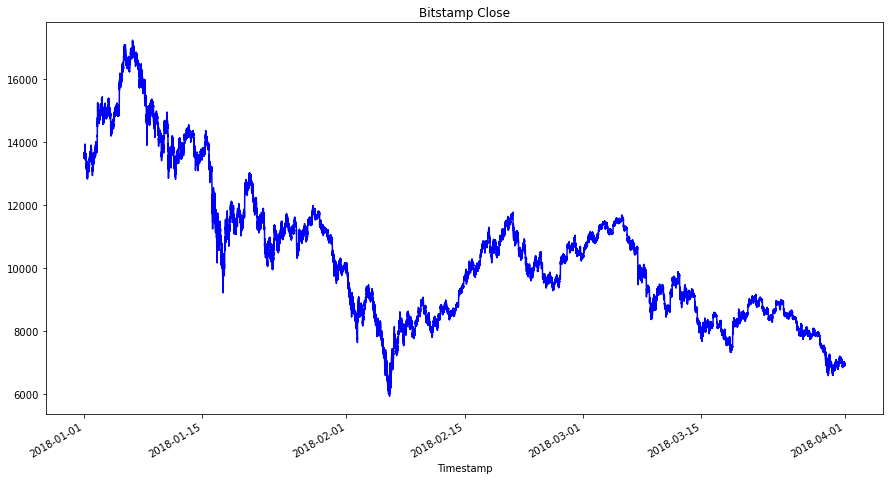

In [27]:
bitstamp['Close'].plot(figsize=(15,8), title = "Bitstamp Close", color='blue')

<AxesSubplot:title={'center':'Bitstamp Weighted Price'}, xlabel='Timestamp'>

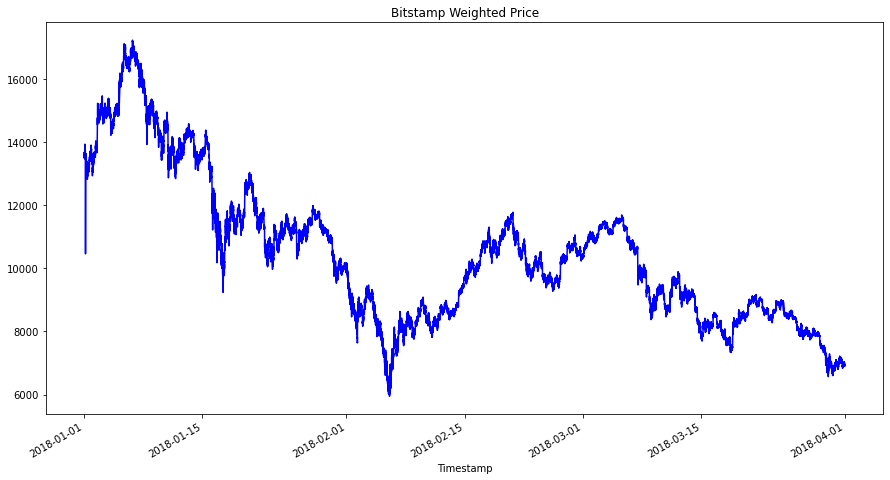

In [28]:
bitstamp['Weighted Price'].plot(figsize=(15,8), title = "Bitstamp Weighted Price", color='blue')

<AxesSubplot:title={'center':'Coinbase Open'}, xlabel='Timestamp'>

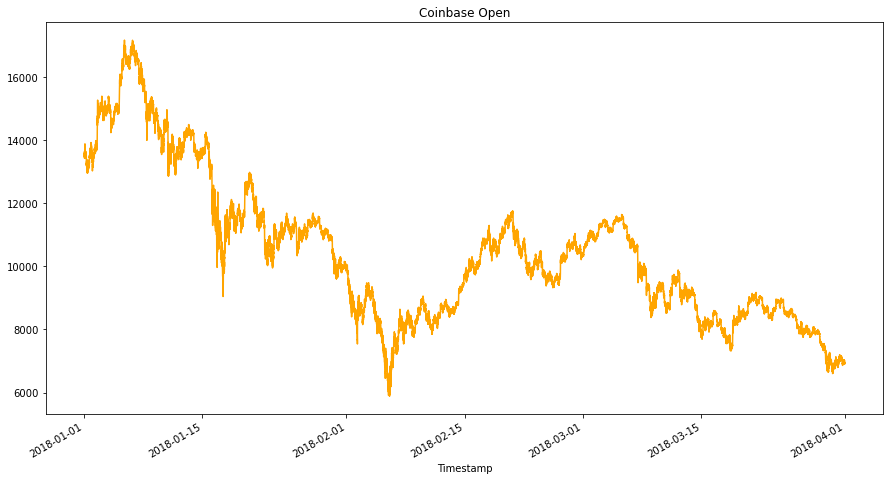

In [29]:
# Create a line plot for the coinbase DataFrame for the full length of time in the dataset 
# Be sure that the figure size, title, and color are tailored to each visualization
coinbase['Open'].plot(figsize=(15,8), title = "Coinbase Open", color='orange')

<AxesSubplot:title={'center':'Coinbase Close'}, xlabel='Timestamp'>

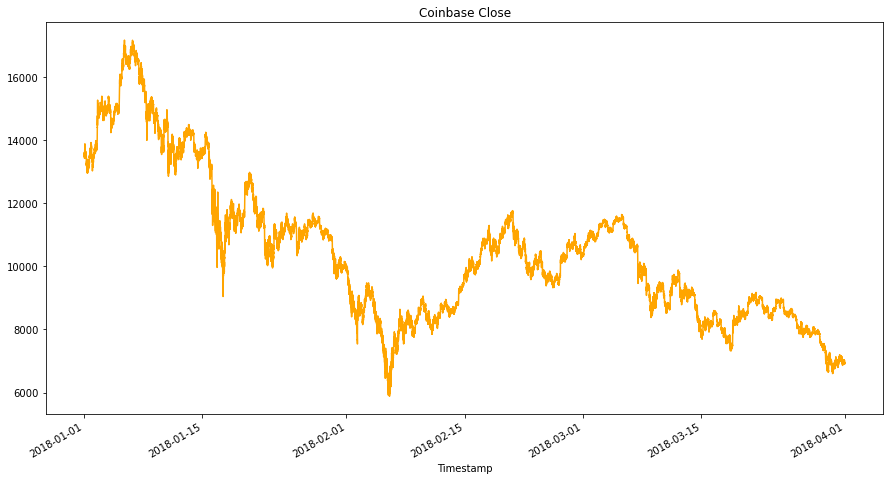

In [30]:
coinbase['Close'].plot(figsize=(15,8), title = "Coinbase Close", color='orange')

<AxesSubplot:title={'center':'Coinbase Weighted Price'}, xlabel='Timestamp'>

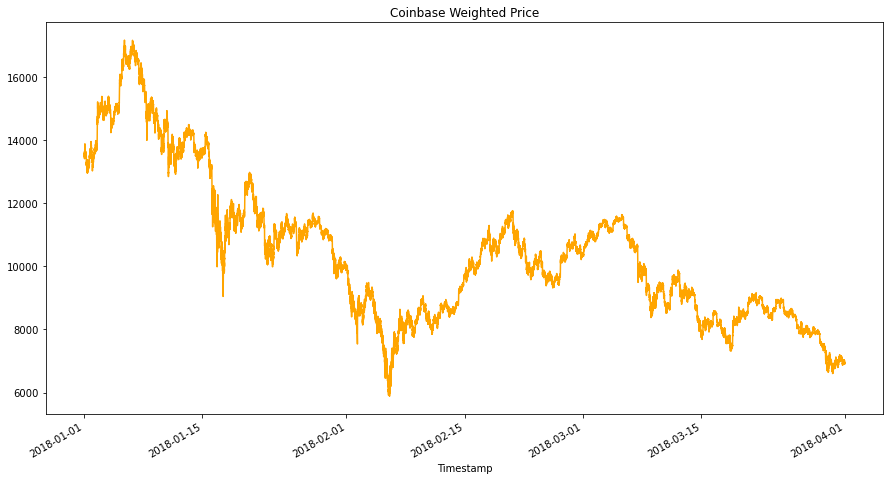

In [31]:
coinbase['Weighted Price'].plot(figsize=(15,8), title = "Coinbase Weighted Price", color='orange')

<AxesSubplot:title={'center':'Bitstamp & Coinbase Closing Price'}, xlabel='Timestamp'>

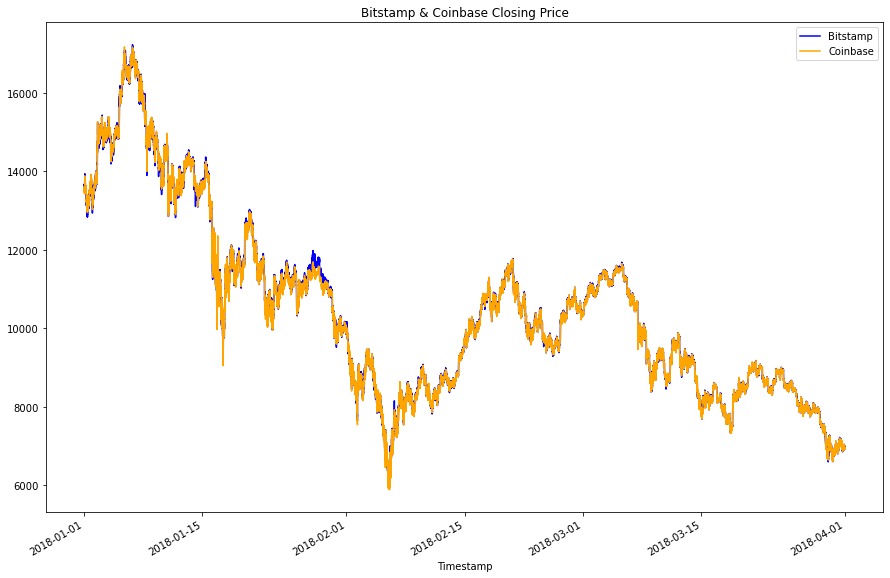

In [32]:
# Overlay the visualizations for the bitstamp and coinbase DataFrames in one plot
# The plot should visualize the prices over the full lenth of the dataset
# Be sure to include the parameters: legend, figure size, title, and color and label
bitstamp['Close'].plot(legend=True, figsize=(15,10), title='Bitstamp & Coinbase Closing Price', color='blue', label='Bitstamp')
coinbase['Close'].plot(legend=True, figsize=(15,10), color='orange', label='Coinbase')

<AxesSubplot:title={'center':'Bitstamp & Coinbase Closing Price (Jan 2018)'}, xlabel='Timestamp'>

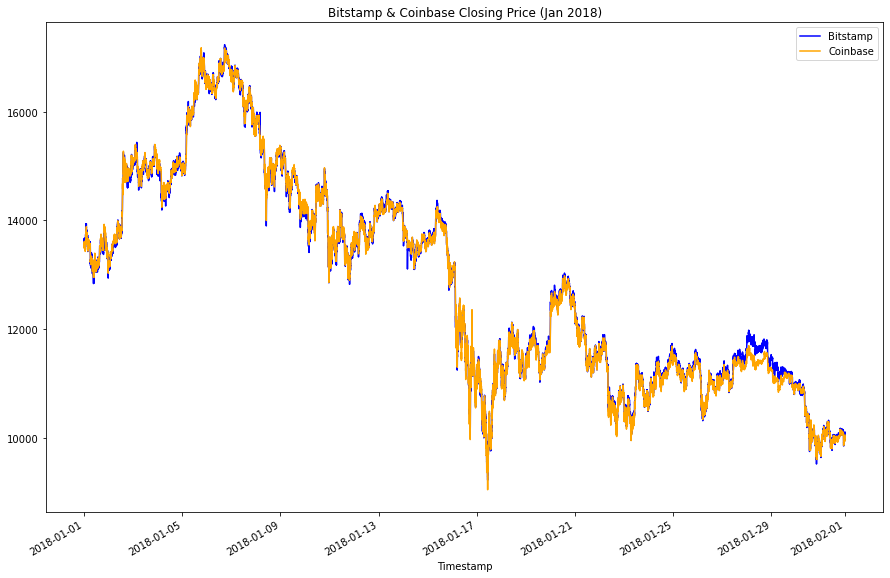

In [33]:
# Using the loc and plot functions, create an overlay plot that visualizes 
# the price action of both DataFrames for a one month period early in the dataset
# Be sure to include the parameters: legend, figure size, title, and color and label
bitstamp['Close'].loc['2018-01-01' : '2018-01-31'].plot(
    legend=True, figsize=(15,10), title='Bitstamp & Coinbase Closing Price (Jan 2018)', color='blue', label='Bitstamp')
coinbase['Close'].loc['2018-01-01' : '2018-01-31'].plot(
    legend=True, figsize=(15,10), color='orange', label='Coinbase')

<AxesSubplot:title={'center':'Bitstamp & Coinbase Closing Price (February 2018)'}, xlabel='Timestamp'>

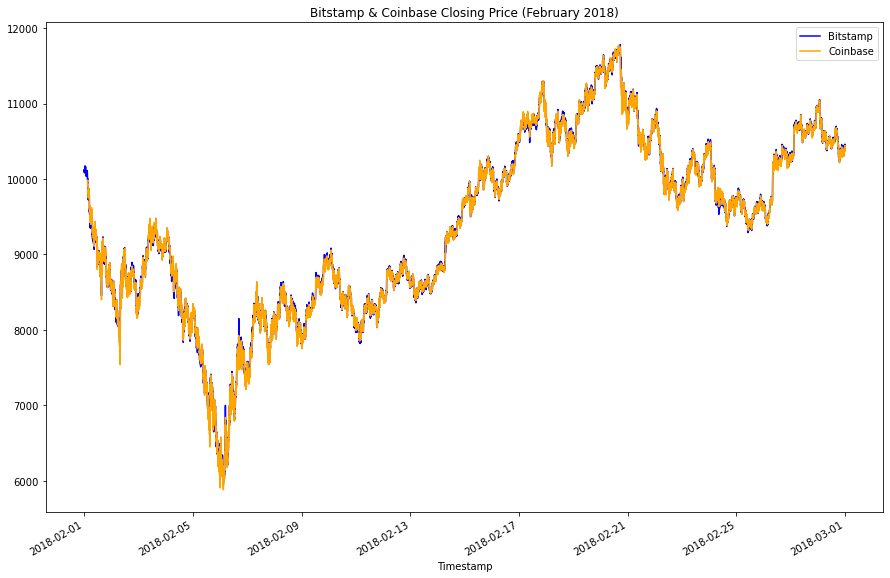

In [34]:
bitstamp['Close'].loc['2018-02-01' : '2018-02-28'].plot(
    legend=True, figsize=(15,10), title='Bitstamp & Coinbase Closing Price (February 2018)', color='blue', label='Bitstamp')
coinbase['Close'].loc['2018-02-01' : '2018-02-28'].plot(
    legend=True, figsize=(15,10), color='orange', label='Coinbase')

<AxesSubplot:title={'center':'Bitstamp & Coinbase Closing Price (March 2018)'}, xlabel='Timestamp'>

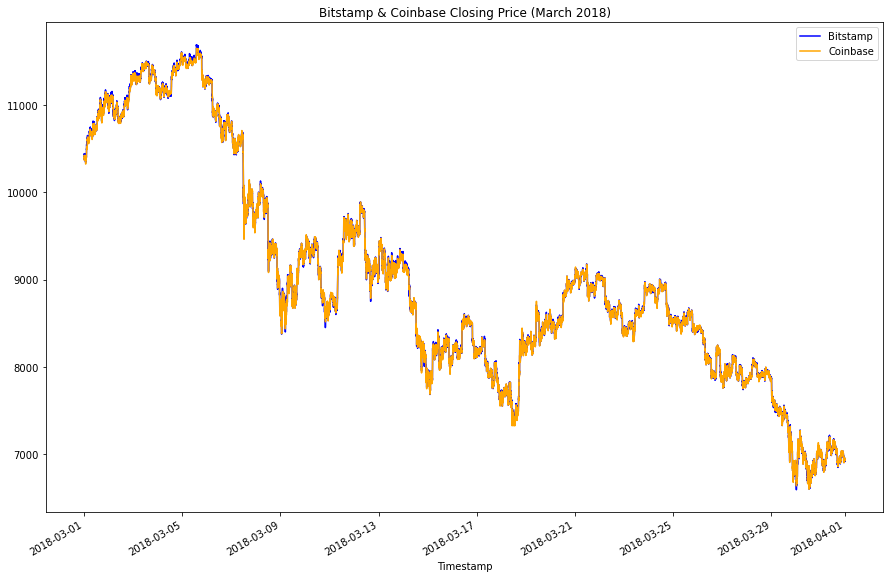

In [35]:
# Using the loc and plot functions, create an overlay plot that visualizes 
# the price action of both DataFrames for a one month period later in the dataset
# Be sure to include the parameters: legend, figure size, title, and color and label 
bitstamp['Close'].loc['2018-03-01' : '2018-03-31'].plot(
    legend=True, figsize=(15,10), title='Bitstamp & Coinbase Closing Price (March 2018)', color='blue', label='Bitstamp')
coinbase['Close'].loc['2018-03-01' : '2018-03-31'].plot(
    legend=True, figsize=(15,10), color='orange', label='Coinbase')

**Question** Based on the visualizations of the different time periods, has the degree of spread change as time progressed?

**Answer** The spread between closing prices appears to be greatest during the last week of January, and is certainly getting less during the month of March

### Step 3: Focus Your Analysis on Specific Dates

Focus your analysis on specific dates by completing the following steps:

1. Select three dates to evaluate for arbitrage profitability. Choose one date that’s early in the dataset, one from the middle of the dataset, and one from the later part of the time period.

2. For each of the three dates, generate the summary statistics and then create a box plot. This big-picture view is meant to help you gain a better understanding of the data before you perform your arbitrage calculations. As you compare the data, what conclusions can you draw?

<AxesSubplot:title={'center':'Bitstamp & Coinbase Closing Price (5 Jan 2018)'}, xlabel='Timestamp'>

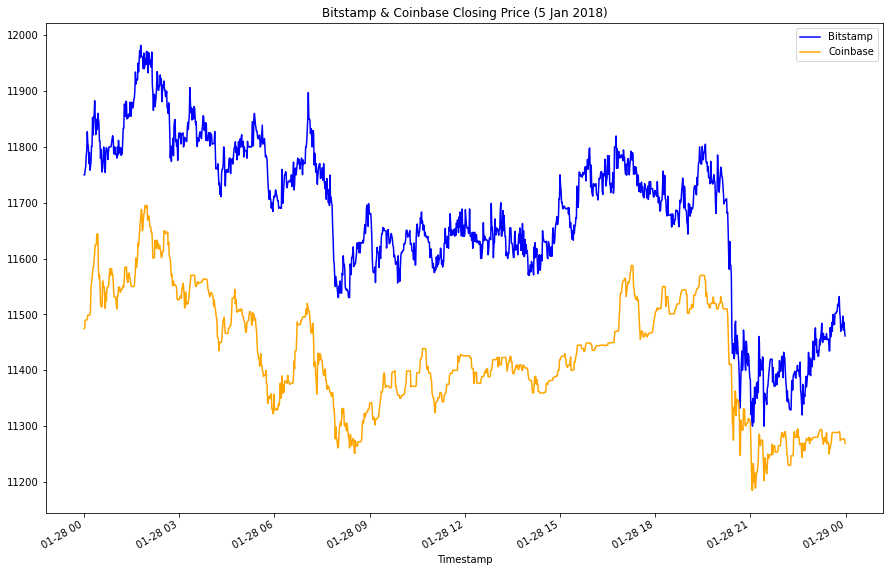

In [36]:
# Create an overlay plot that visualizes the two dataframes over a period of one day early in the dataset. 
# Be sure that the plots include the parameters `legend`, `figsize`, `title`, `color` and `label` 
bitstamp['Close'].loc['2018-01-28' : '2018-01-28'].plot(
    legend=True, figsize=(15,10), title='Bitstamp & Coinbase Closing Price (5 Jan 2018)', color='blue', label='Bitstamp')
coinbase['Close'].loc['2018-01-28' : '2018-01-28'].plot(
    legend=True, figsize=(15,10), color='orange', label='Coinbase')

In [37]:
# Using the early date that you have selected, calculate the arbitrage spread 
# by subtracting the bitstamp lower closing prices from the coinbase higher closing prices
arbitrage_spread_early = bitstamp['Close'].loc['2018-01-28'] - coinbase['Close'].loc['2018-01-28'] 

# Generate summary statistics for the early DataFrame
arbitrage_spread_early.describe()

count    1436.000000
mean      247.552326
std        68.343472
min        55.030000
25%       210.022500
50%       251.180000
75%       290.925000
max       439.010000
Name: Close, dtype: float64

<AxesSubplot:>

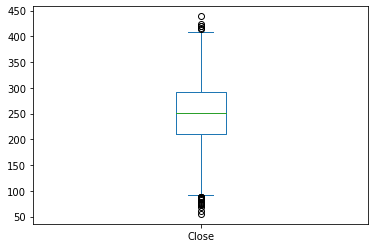

In [38]:
# Visualize the arbitrage spread from early in the dataset in a box plot
arbitrage_spread_early.plot.box()

<AxesSubplot:title={'center':'Bitstamp & Coinbase Closing Price (15 Feb 2018)'}, xlabel='Timestamp'>

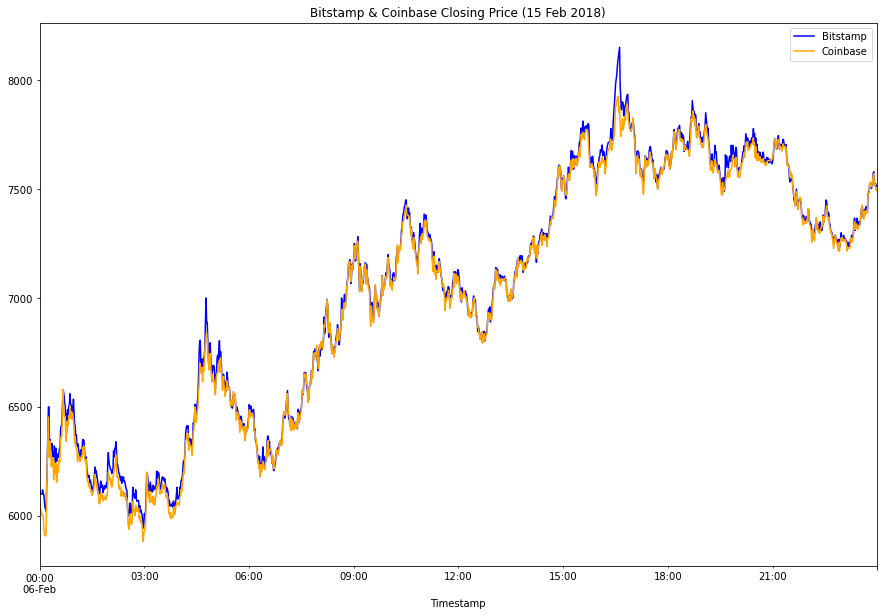

In [39]:
# Create an overlay plot that visualizes the two dataframes over a period of one day from the middle of the dataset. 
# Be sure that the plots include the parameters `legend`, `figsize`, `title`, `color` and `label` 
bitstamp['Close'].loc['2018-02-06' : '2018-02-06'].plot(
    legend=True, figsize=(15,10), title='Bitstamp & Coinbase Closing Price (15 Feb 2018)', color='blue', label='Bitstamp')
coinbase['Close'].loc['2018-02-06' : '2018-02-06'].plot(
    legend=True, figsize=(15,10), color='orange', label='Coinbase')

In [40]:
# Using the date in the middle that you have selected, calculate the arbitrage spread 
# by subtracting the bitstamp lower closing prices from the coinbase higher closing prices
arbitrage_spread_middle = bitstamp['Close'].loc['2018-02-06'] - coinbase['Close'].loc['2018-02-06'] 

# Generate summary statistics 
arbitrage_spread_middle.describe()

count    1440.000000
mean       23.841236
std        30.390321
min       -51.000000
25%         4.675000
50%        19.375000
75%        37.877500
max       280.010000
Name: Close, dtype: float64

<AxesSubplot:>

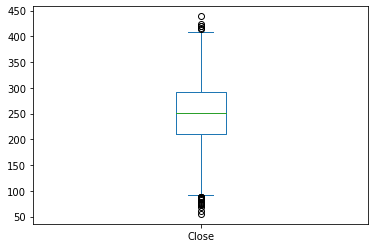

In [41]:
# Visualize the arbitrage spread from the middle of the dataset in a box plot
arbitrage_spread_early.plot.box()

<AxesSubplot:title={'center':'Bitstamp & Coinbase Closing Price (29 Mar 2018)'}, xlabel='Timestamp'>

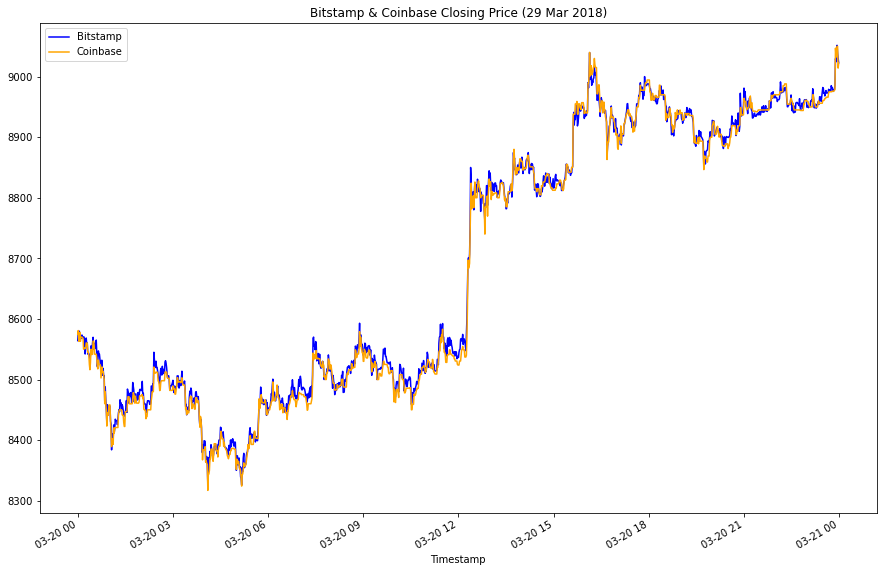

In [42]:
# Create an overlay plot that visualizes the two dataframes over a period of one day from late in the dataset. 
# Be sure that the plots include the parameters `legend`, `figsize`, `title`, `color` and `label` 
bitstamp['Close'].loc['2018-03-20' : '2018-03-20'].plot(
    legend=True, figsize=(15,10), title='Bitstamp & Coinbase Closing Price (29 Mar 2018)', color='blue', label='Bitstamp')
coinbase['Close'].loc['2018-03-20' : '2018-03-20'].plot(
    legend=True, figsize=(15,10), color='orange', label='Coinbase')

In [43]:
# Using the date from the late that you have selected, calculate the arbitrage spread 
# by subtracting the bitstamp lower closing prices from the coinbase higher closing prices
arbitrage_spread_late =  coinbase['Close'].loc['2018-03-05'] - bitstamp['Close'].loc['2018-03-05']

# Generate summary statistics for the late DataFrame
arbitrage_spread_late.describe()

count    1437.000000
mean      -11.817683
std        14.276780
min       -68.280000
25%       -20.470000
50%       -11.500000
75%        -2.940000
max        33.180000
Name: Close, dtype: float64

<AxesSubplot:>

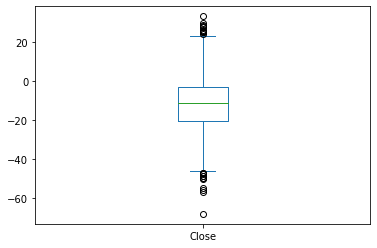

In [44]:
# Visualize the arbitrage spread from late in the dataset in a box plot
arbitrage_spread_late.plot.box()

### Step 4: Calculate the Arbitrage Profits

Calculate the potential profits for each date that you selected in the previous section. Your goal is to determine whether arbitrage opportunities still exist in the Bitcoin market. Complete the following steps:

1. For each of the three dates, measure the arbitrage spread between the two exchanges by subtracting the lower-priced exchange from the higher-priced one. Then use a conditional statement to generate the summary statistics for each arbitrage_spread DataFrame, where the spread is greater than zero.

2. For each of the three dates, calculate the spread returns. To do so, divide the instances that have a positive arbitrage spread (that is, a spread greater than zero) by the price of Bitcoin from the exchange you’re buying on (that is, the lower-priced exchange). Review the resulting DataFrame.

3. For each of the three dates, narrow down your trading opportunities even further. To do so, determine the number of times your trades with positive returns exceed the 1% minimum threshold that you need to cover your costs.

4. Generate the summary statistics of your spread returns that are greater than 1%. How do the average returns compare among the three dates?

5. For each of the three dates, calculate the potential profit, in dollars, per trade. To do so, multiply the spread returns that were greater than 1% by the cost of what was purchased. Make sure to drop any missing values from the resulting DataFrame.

6. Generate the summary statistics, and plot the results for each of the three DataFrames.

7. Calculate the potential arbitrage profits that you can make on each day. To do so, sum the elements in the profit_per_trade DataFrame.

8. Using the `cumsum` function, plot the cumulative sum of each of the three DataFrames. Can you identify any patterns or trends in the profits across the three time periods?

(NOTE: The starter code displays only one date. You'll want to do this analysis for two additional dates).

#### 1. For each of the three dates, measure the arbitrage spread between the two exchanges by subtracting the lower-priced exchange from the higher-priced one. Then use a conditional statement to generate the summary statistics for each arbitrage_spread DataFrame, where the spread is greater than zero.

*NOTE*: For illustration, only one of the three dates is shown in the starter code below.

In [45]:
# For the date early in the dataset, measure the arbitrage spread between the two exchanges
# by subtracting the lower-priced exchange from the higher-priced one
arbitrage_spread_early = bitstamp['Close'].loc['2018-01-28'] - coinbase['Close'].loc['2018-01-28']

# Use a conditional statement to generate the summary statistics for each arbitrage_spread DataFrame
arbitrage_spread_early[arbitrage_spread_early>0].describe()
    

count    1436.000000
mean      247.552326
std        68.343472
min        55.030000
25%       210.022500
50%       251.180000
75%       290.925000
max       439.010000
Name: Close, dtype: float64

In [46]:
#data summary for 15 Feb 2018
arbitrage_spread_middle = bitstamp['Close'].loc['2018-02-06'] - coinbase['Close'].loc['2018-02-06']
arbitrage_spread_middle[arbitrage_spread_middle>0].describe()

count    1177.000000
mean       31.294452
std        28.481383
min         0.010000
25%        13.000000
50%        24.530000
75%        42.540000
max       280.010000
Name: Close, dtype: float64

In [47]:
#data summary for 29 March 2018
arbitrage_spread_late = bitstamp['Close'].loc['2018-03-20'] - coinbase['Close'].loc['2018-03-20'] 
arbitrage_spread_late[arbitrage_spread_late>0].describe()

count    980.000000
mean       9.290367
std        6.611229
min        0.010000
25%        4.240000
50%        8.440000
75%       13.165000
max       59.950000
Name: Close, dtype: float64

#### 2. For each of the three dates, calculate the spread returns. To do so, divide the instances that have a positive arbitrage spread (that is, a spread greater than zero) by the price of Bitcoin from the exchange you’re buying on (that is, the lower-priced exchange). Review the resulting DataFrame.

In [48]:
# For the date early in the dataset, calculate the spread returns by dividing the instances when the arbitrage spread is positive (> 0) 
# by the price of Bitcoin from the exchange you are buying on (the lower-priced exchange).
spread_return_early= arbitrage_spread_early[arbitrage_spread_early>0]/bitstamp['Close'].loc['2018-01-28']

# Review the spread return DataFrame
spread_return_early

Timestamp
2018-01-28 00:00:00    0.023437
2018-01-28 00:01:00    0.023404
2018-01-28 00:02:00    0.022857
2018-01-28 00:03:00    0.023377
2018-01-28 00:04:00    0.024971
                         ...   
2018-01-28 23:55:00    0.019144
2018-01-28 23:56:00    0.017007
2018-01-28 23:57:00    0.018174
2018-01-28 23:58:00    0.017008
2018-01-28 23:59:00    0.016807
Name: Close, Length: 1436, dtype: float64

In [49]:
#calculating the spread returns for 15 Feb 2018
spread_return_middle = arbitrage_spread_middle[arbitrage_spread_middle>0]/bitstamp['Close'].loc['2018-02-06']
spread_return_middle

Timestamp
2018-02-06 00:00:00    0.009983
2018-02-06 00:01:00    0.009852
2018-02-06 00:02:00    0.012449
2018-02-06 00:03:00    0.013933
2018-02-06 00:04:00    0.015752
                         ...   
2018-02-06 23:55:00         NaN
2018-02-06 23:56:00         NaN
2018-02-06 23:57:00    0.003260
2018-02-06 23:58:00    0.001534
2018-02-06 23:59:00    0.003147
Name: Close, Length: 1440, dtype: float64

In [50]:
#Calculating the spread returns for 29 March 2018
spread_return_late = arbitrage_spread_late[arbitrage_spread_late>0]/bitstamp['Close'].loc['2018.03.20']
spread_return_late

Timestamp
2018-03-20 00:00:00         NaN
2018-03-20 00:01:00         NaN
2018-03-20 00:02:00    0.001399
2018-03-20 00:03:00    0.001956
2018-03-20 00:04:00         NaN
                         ...   
2018-03-20 23:55:00    0.001232
2018-03-20 23:56:00    0.000184
2018-03-20 23:57:00         NaN
2018-03-20 23:58:00    0.001854
2018-03-20 23:59:00    0.000092
Name: Close, Length: 1432, dtype: float64

#### 3. For each of the three dates, narrow down your trading opportunities even further. To do so, determine the number of times your trades with positive returns exceed the 1% minimum threshold that you need to cover your costs.

In [51]:
# For the date early in the dataset, determine the number of times your trades with positive returns 
# exceed the 1% minimum threshold (.01) that you need to cover your costs
profitable_trades_early = spread_return_early[spread_return_early>.01]
# Review the first five profitable trades
profitable_trades_early

Timestamp
2018-01-28 00:00:00    0.023437
2018-01-28 00:01:00    0.023404
2018-01-28 00:02:00    0.022857
2018-01-28 00:03:00    0.023377
2018-01-28 00:04:00    0.024971
                         ...   
2018-01-28 23:55:00    0.019144
2018-01-28 23:56:00    0.017007
2018-01-28 23:57:00    0.018174
2018-01-28 23:58:00    0.017008
2018-01-28 23:59:00    0.016807
Name: Close, Length: 1377, dtype: float64

In [52]:
# filtering the 15 Feb data for trades that exceed minimum threshold of 1%
profitable_trades_middle = spread_return_middle[spread_return_middle>.01]
profitable_trades_middle

Timestamp
2018-02-06 00:02:00    0.012449
2018-02-06 00:03:00    0.013933
2018-02-06 00:04:00    0.015752
2018-02-06 00:05:00    0.018794
2018-02-06 00:06:00    0.016411
                         ...   
2018-02-06 17:05:00    0.010585
2018-02-06 19:39:00    0.015566
2018-02-06 19:41:00    0.012093
2018-02-06 19:46:00    0.012391
2018-02-06 19:49:00    0.014356
Name: Close, Length: 109, dtype: float64

In [53]:
# Filtering the 29 March data for trades that exceed the minimum threshold of 1%
profitable_trades_late = spread_return_late[spread_return_late>.01]
profitable_trades_late

Series([], Name: Close, dtype: float64)

#### 4. Generate the summary statistics of your spread returns that are greater than 1%. How do the average returns compare among the three dates?

In [54]:
# For the date early in the dataset, generate the summary statistics for the profitable trades
# or you trades where the spread returns are are greater than 1%
profitable_trades_early.describe()

count    1377.000000
mean        0.021700
std         0.005179
min         0.010006
25%         0.018666
50%         0.021711
75%         0.024784
max         0.037082
Name: Close, dtype: float64

In [55]:
#summary statistics for profitable trades on 15 Feb 2018
profitable_trades_middle.describe()

count    109.000000
mean       0.014122
std        0.005092
min        0.010002
25%        0.010811
50%        0.012063
75%        0.015566
max        0.035665
Name: Close, dtype: float64

In [56]:
# Summary statistics for profitable trades on 29 March 2018
profitable_trades_late.describe()

count    0.0
mean     NaN
std      NaN
min      NaN
25%      NaN
50%      NaN
75%      NaN
max      NaN
Name: Close, dtype: float64

#### 5. For each of the three dates, calculate the potential profit, in dollars, per trade. To do so, multiply the spread returns that were greater than 1% by the cost of what was purchased. Make sure to drop any missing values from the resulting DataFrame.

In [57]:
# For the date early in the dataset, calculate the potential profit per trade in dollars 
# Multiply the profitable trades by the cost of the Bitcoin that was purchased
profit_early = profitable_trades_early*bitstamp['Close'].loc['2018-01-28']

# Drop any missing values from the profit DataFrame
profit_per_trade_early = profit_early.dropna()

# View the early profit DataFrame
profit_per_trade_early

Timestamp
2018-01-28 00:00:00    275.38
2018-01-28 00:01:00    275.00
2018-01-28 00:02:00    268.77
2018-01-28 00:03:00    275.03
2018-01-28 00:04:00    294.26
                        ...  
2018-01-28 23:55:00    220.10
2018-01-28 23:56:00    195.11
2018-01-28 23:57:00    208.74
2018-01-28 23:58:00    195.12
2018-01-28 23:59:00    192.63
Name: Close, Length: 1377, dtype: float64

In [58]:
#potential profit per trade on 15 Feb 2018 that meets threshold criteria of 1%
profit_middle = profitable_trades_middle*bitstamp['Close'].loc['2018-02-06']
profit_per_trade_middle = profit_middle.dropna()
profit_per_trade_middle

Timestamp
2018-02-06 00:02:00     75.95
2018-02-06 00:03:00     84.99
2018-02-06 00:04:00     96.09
2018-02-06 00:05:00    115.00
2018-02-06 00:06:00    100.11
                        ...  
2018-02-06 17:05:00     81.00
2018-02-06 19:39:00    119.18
2018-02-06 19:41:00     92.51
2018-02-06 19:46:00     94.79
2018-02-06 19:49:00    110.55
Name: Close, Length: 109, dtype: float64

In [59]:
# Potential profit per trade on 29 March 2018 that meet threshold criteria of 1%
profit_late = profitable_trades_late*bitstamp['Close'].loc['2018-03-29']
profit_per_trade_late = profit_late.dropna()
profit_per_trade_late

Series([], Name: Close, dtype: float64)

#### 6. Generate the summary statistics, and plot the results for each of the three DataFrames.

In [60]:
# Generate the summary statistics for the early profit per trade DataFrame
profit_per_trade_early.describe()

count    1377.000000
mean      254.033275
std        61.966468
min       113.970000
25%       217.400000
50%       254.190000
75%       292.990000
max       439.010000
Name: Close, dtype: float64

In [61]:
#Summary statistics for profitable tradss on 15 Feb 2018
profit_per_trade_middle.describe()

count    109.000000
mean      95.182202
std       41.231214
min       61.690000
25%       68.220000
50%       80.330000
75%      106.970000
max      280.010000
Name: Close, dtype: float64

In [62]:
# Summary statistics for profitable trades on 29 Mar 2018
profit_per_trade_late.describe()

count    0.0
mean     NaN
std      NaN
min      NaN
25%      NaN
50%      NaN
75%      NaN
max      NaN
Name: Close, dtype: float64

<AxesSubplot:xlabel='Timestamp'>

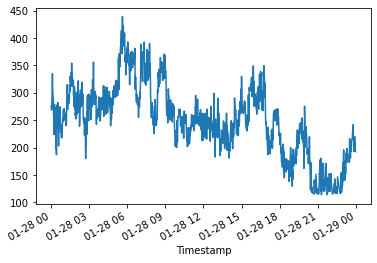

In [63]:
# Plot the results for the early profit per trade DataFrame
profit_per_trade_early.plot()

<AxesSubplot:xlabel='Timestamp'>

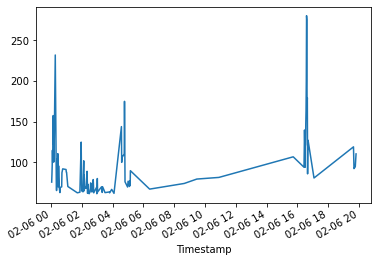

In [64]:
#Plotted Results for profitable trades on 15 Feb 2018
profit_per_trade_middle.plot()

<AxesSubplot:xlabel='Timestamp'>

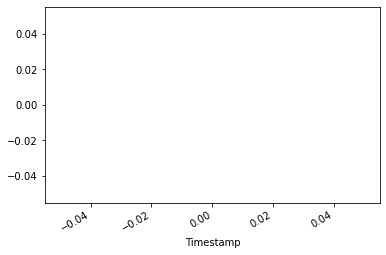

In [65]:
# Plotted Results for trades on 29 Mar 2018
profit_per_trade_late.plot()

#### 7. Calculate the potential arbitrage profits that you can make on each day. To do so, sum the elements in the profit_per_trade DataFrame.

In [66]:
# Calculate the sum of the potential profits for the early profit per trade DataFrame
profit_per_trade_early.sum()

349803.8200000001

In [67]:
#Total value of potential trades on 15 Feb 2018
profit_per_trade_middle.sum()

10374.859999999993

In [68]:
#Total Value of potential trades on 29 Mar 2018
profit_per_trade_late.sum()

0.0

#### 8. Using the `cumsum` function, plot the cumulative sum of each of the three DataFrames. Can you identify any patterns or trends in the profits across the three time periods?

In [69]:
# Use the cumsum function to calculate the cumulative profits over time for the early profit per trade DataFrame
cumulative_profit_early = profit_per_trade_early.cumsum()

<AxesSubplot:title={'center':'Cumulative Profits xx January 2018'}, xlabel='Timestamp'>

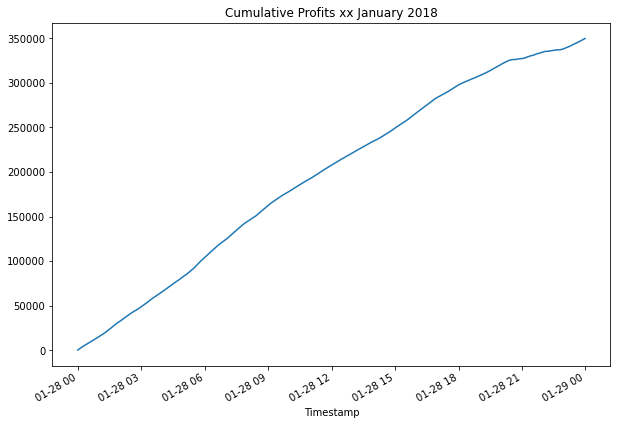

In [70]:
# Plot the cumulative sum of profits for the early profit per trade DataFrame
cumulative_profit_early.plot(figsize=(10,7), title="Cumulative Profits xx January 2018")

<AxesSubplot:title={'center':'Cumulative Profits xx February 2018'}, xlabel='Timestamp'>

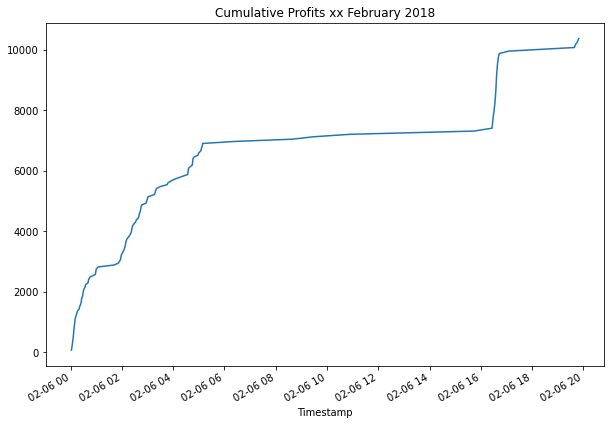

In [71]:
cumulative_profit_middle = profit_per_trade_middle.cumsum()
cumulative_profit_middle.plot(figsize=(10,7), title="Cumulative Profits xx February 2018")

<AxesSubplot:title={'center':'Cumulative Profits xx March 2018'}, xlabel='Timestamp'>

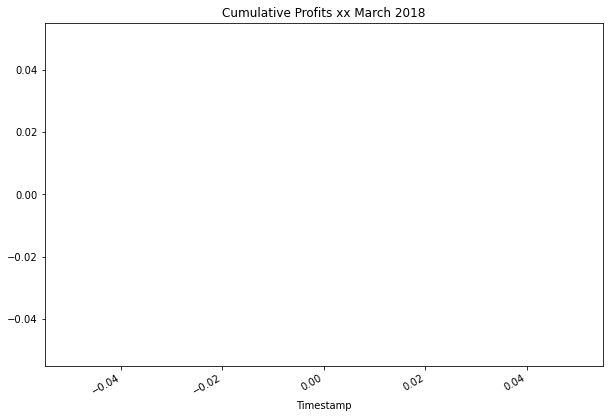

In [72]:
cumulative_profit_late = profit_per_trade_late.cumsum()
cumulative_profit_late.plot(figsize=(10,7), title="Cumulative Profits xx March 2018")

**Question:** After reviewing the profit information across each date from the different time periods, can you identify any patterns or trends?
    
**Answer:** In January we saw strong arbitrage opportunities, especially early in the month, and over time we saw the opportunities decrease with February presenting less opportunities, and I have been unable to find any ooportunities in March.  This tells me that the market is correcting the innefficies we were able to identify in January and February, and if we are going to cotinue to make profit via arbitrage we will need to find a service that charges less than 1% per transaction.